In [127]:
import pandas as pd
import numpy as np

data = np.array(pd.read_csv('iris.data', header=None))
no_labeled_data = np.delete(data, np.s_[4], axis=1)

In [128]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [129]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data,
                                           k_means_cluster_centers)

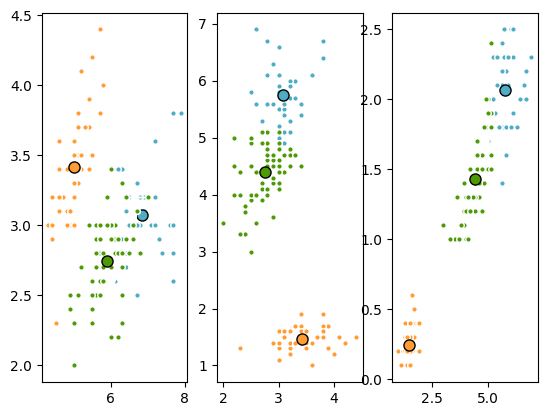

In [130]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]
    for j in range(3):
        ax[j].plot(no_labeled_data[my_members, j], no_labeled_data[my_members, j + 1], 'w', markerfacecolor=colors[i],
                   marker='o', markersize=4)
        ax[j].plot(cluster_center[j], cluster_center[j + 1], 'o', markerfacecolor=colors[i],
                   markeredgecolor='k', markersize=8)
plt.show()

In [131]:
print(
    '''n_init - Сколько раз алгоритм k-средних запускается с разными начальными значениями центроидов. Окончательные результаты — это лучший результат n_init последовательных запусков с точки зрения инерции.
    Для признаков 2 и 3 произошло наилучшее разделение.''')

n_init - Сколько раз алгоритм k-средних запускается с разными начальными значениями центроидов. Окончательные результаты — это лучший результат n_init последовательных запусков с точки зрения инерции.
    Для признаков 2 и 3 произошло наилучшее разделение.


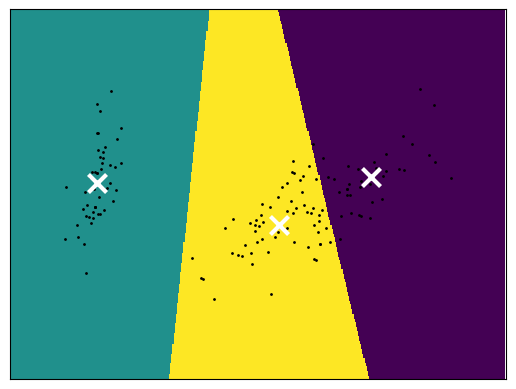

In [132]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=15)
kmeans.fit(reduced_data)
h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

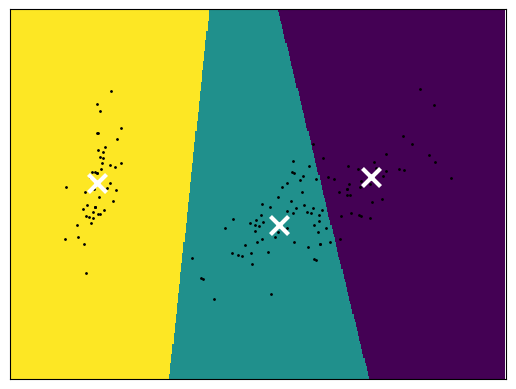

In [133]:
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init="random", n_clusters=3, n_init=15)
kmeans.fit(reduced_data)
h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

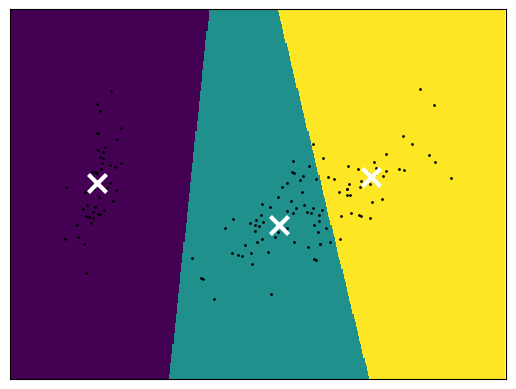

In [134]:
import warnings
import sys
import os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init=[[-2.64084076, 0.19051995],
                      [0.66443351, -0.33029221],
                      [2.34645113, 0.27235455]], n_clusters=3, n_init=15)

kmeans.fit(reduced_data)
h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

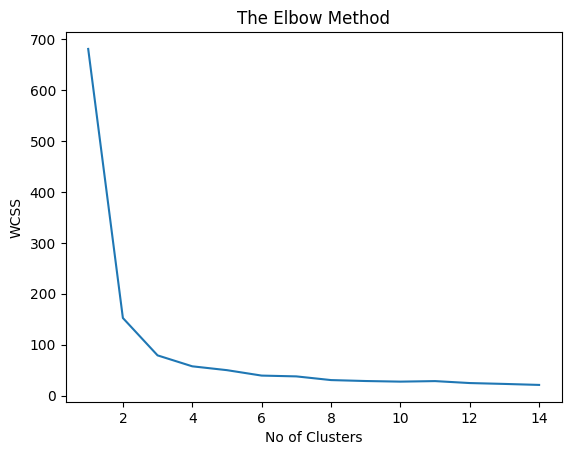

In [135]:
wcss = []
for i in range(1, 15):
    kmean = KMeans(n_clusters=i, init="k-means++", n_init='auto')
    kmean.fit_predict(no_labeled_data)
    wcss.append(kmean.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [136]:
'На графике точка локтя близка к 3. Поэтому мы возьмем наилучшее количество как 3.'

'На графике точка локтя близка к 3. Поэтому мы возьмем наилучшее количество как 3.'

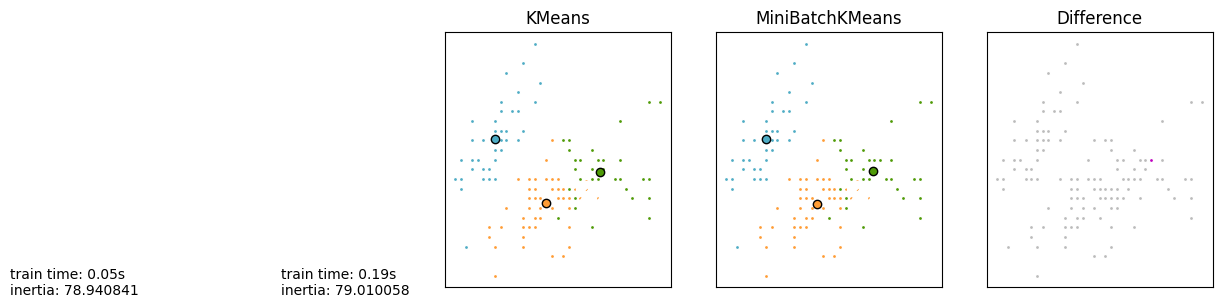

In [137]:
import time

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

batch_size = 45

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(no_labeled_data)
t_batch = time.time() - t0

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()

mbk.fit(no_labeled_data)
t_mini_batch = time.time() - t0

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(no_labeled_data, mbk_means_cluster_centers)

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(3), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(3):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identic = np.logical_not(different)
ax.plot(no_labeled_data[identic, 0], no_labeled_data[identic, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(no_labeled_data[different, 0], no_labeled_data[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()



In [138]:
'В MiniBatchKMeans является вариант KMeans алгоритма , который использует мини-серий для уменьшения времени вычислений, в то же время пытается оптимизировать ту же целевую функцию. Мини-пакеты - это подмножества входных данных, которые выбираются случайным образом на каждой итерации обучения. Эти мини-пакеты резко сокращают объем вычислений, необходимых для сходимости к локальному решению. В отличие от других алгоритмов, которые сокращают время сходимости k-средних, мини-пакетные k-средние дают результаты, которые обычно лишь немного хуже, чем стандартный алгоритм.'

'В MiniBatchKMeans является вариант KMeans алгоритма , который использует мини-серий для уменьшения времени вычислений, в то же время пытается оптимизировать ту же целевую функцию. Мини-пакеты - это подмножества входных данных, которые выбираются случайным образом на каждой итерации обучения. Эти мини-пакеты резко сокращают объем вычислений, необходимых для сходимости к локальному решению. В отличие от других алгоритмов, которые сокращают время сходимости k-средних, мини-пакетные k-средние дают результаты, которые обычно лишь немного хуже, чем стандартный алгоритм.'

In [139]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

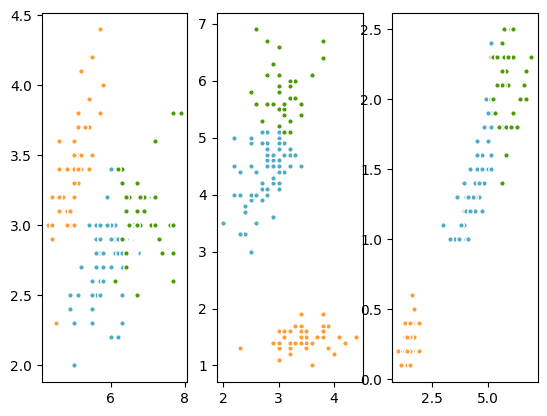

In [140]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
for i in range(3):
    my_members = hier_labels == i
    for j in range(3):
        ax[j].plot(no_labeled_data[my_members, j],
                   no_labeled_data[my_members, j + 1], 'w',
                   markerfacecolor=colors[i], marker='o', markersize=4)
plt.show()

In [141]:
'KMeans возможен только для числовых признаков, AgglomerativeClustering можно использовать со многими другими мерами несходства, а не только с метрическими расстояниями, даже, например, с метрическими расстояниями.'

'KMeans возможен только для числовых признаков, AgglomerativeClustering можно использовать со многими другими мерами несходства, а не только с метрическими расстояниями, даже, например, с метрическими расстояниями.'

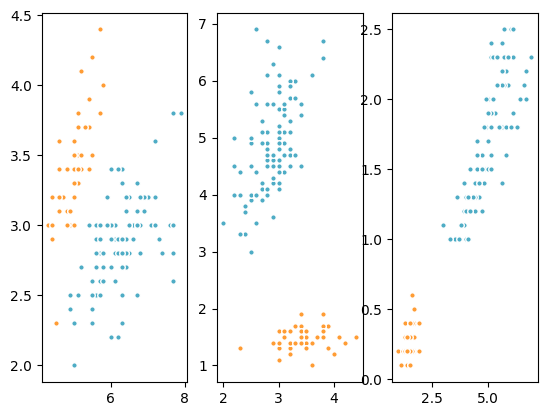

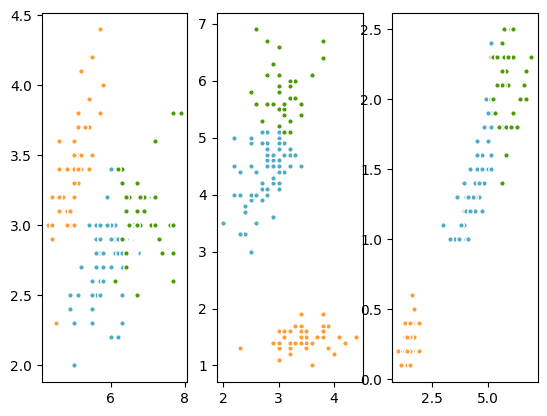

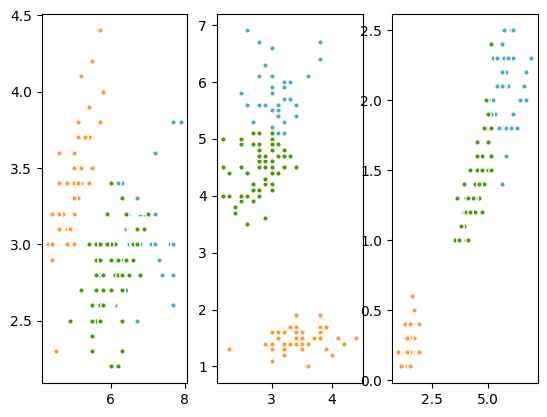

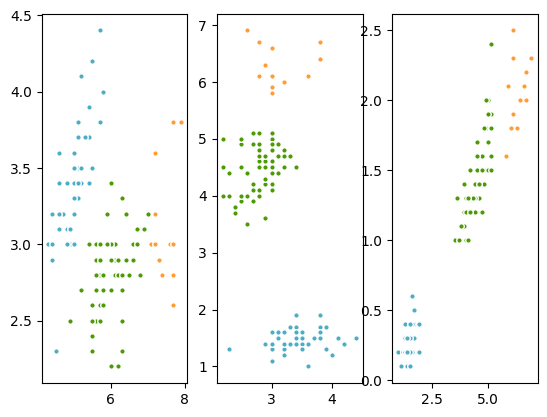

In [142]:
for i in range(2, 6):
    hier = AgglomerativeClustering(n_clusters=i, linkage='average')
    hier = hier.fit(no_labeled_data)
    hier_labels = hier.labels_

    f, ax = plt.subplots(1, 3)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    for i in range(3):
        my_members = hier_labels == i
        for j in range(3):
            ax[j].plot(no_labeled_data[my_members, j],
                       no_labeled_data[my_members, j + 1], 'w',
                       markerfacecolor=colors[i], marker='o', markersize=4)
    plt.show()

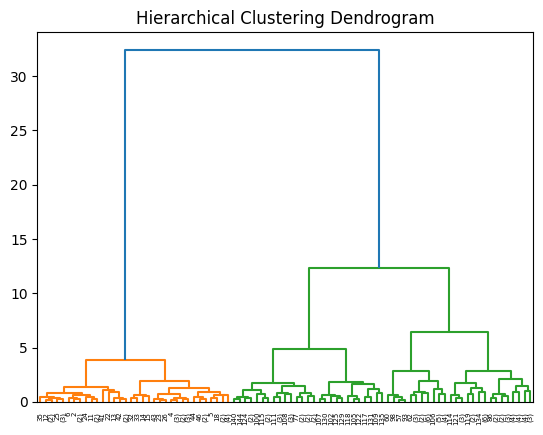

In [143]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3, compute_distances=True)

model = model.fit(no_labeled_data)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.show()

In [144]:
import random
import math

data1 = np.zeros([250, 2])
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i, 0] = r * math.sin(a)
    data1[i, 1] = r * math.cos(a)

data2 = np.zeros([500, 2])
for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i, 0] = r * math.sin(a)
    data2[i, 1] = r * math.cos(a)

data = np.vstack((data1, data2))

In [145]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier = hier.fit(data)
hier_labels = hier.labels_

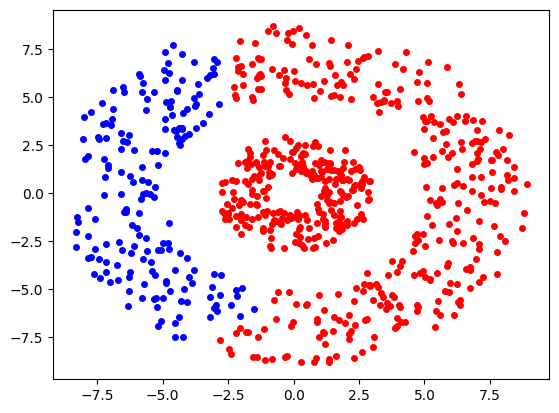

In [146]:
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], marker='o', markersize=4, color='red', linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], marker='o', markersize=4, color='blue', linestyle='None')
plt.show()

ward


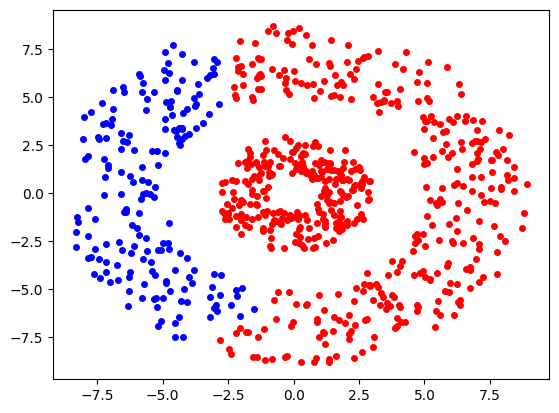

complete


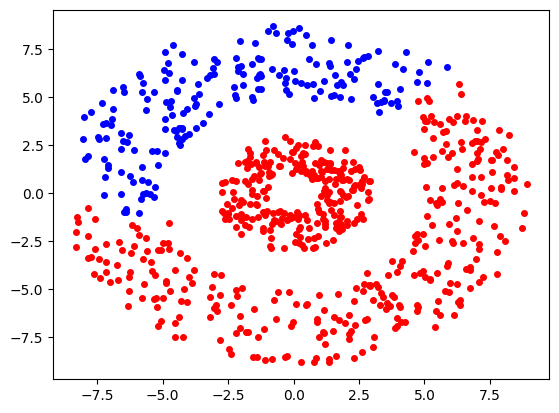

average


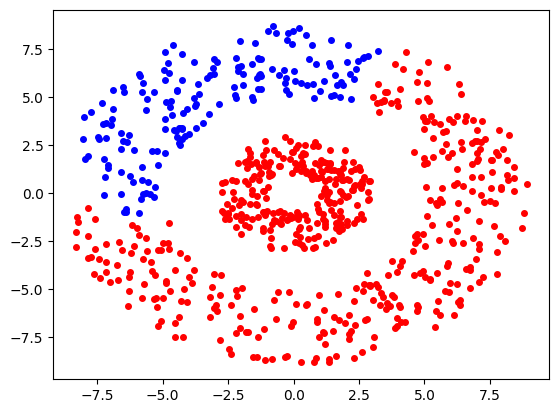

single


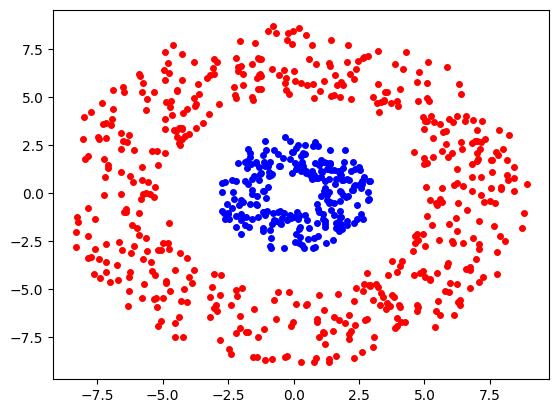

In [147]:
linkage_parameters = ('ward', 'complete', 'average', 'single')
for parameter in linkage_parameters:
    print(parameter)
    hier = AgglomerativeClustering(n_clusters=2, linkage=parameter)
    hier = hier.fit(data)
    hier_labels = hier.labels_

    my_members = hier_labels == 0
    plt.plot(data[my_members, 0], data[my_members, 1], marker='o', markersize=4, color='red', linestyle='None')
    my_members = hier_labels == 1
    plt.plot(data[my_members, 0], data[my_members, 1], marker='o', markersize=4, color='blue', linestyle='None')
    plt.show()

In [148]:
print('''Какой критерий связи использовать. Критерий связи определяет, какое расстояние использовать между наборами наблюдений. Алгоритм объединит пары кластеров, которые минимизируют этот критерий.
- «ward» минимизирует дисперсию объединяемых кластеров.
- «average» использует среднее значение расстояний каждого наблюдения двух наборов.
- «complete» или «maximum» связь использует максимальные расстояния между всеми наблюдениями двух наборов.
- «single» использует минимум расстояний между всеми наблюдениями двух наборов.''')

Какой критерий связи использовать. Критерий связи определяет, какое расстояние использовать между наборами наблюдений. Алгоритм объединит пары кластеров, которые минимизируют этот критерий.
- «ward» минимизирует дисперсию объединяемых кластеров.
- «average» использует среднее значение расстояний каждого наблюдения двух наборов.
- «complete» или «maximum» связь использует максимальные расстояния между всеми наблюдениями двух наборов.
- «single» использует минимум расстояний между всеми наблюдениями двух наборов.
